# K-means

Por [Jose R. Zapata](https://joserzapata.github.io)

K-means (usando scikit-learn) para crear clusters de [Fisher's Iris dataset](http://en.wikipedia.org/wiki/Iris_flower_data_set) (este data set solo tiene 3 variedades: Iris setosa, Iris versicolor, Iris virginica), y graficar estos clusters en 3D. 

In [110]:
#Importar librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets, cluster
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D

## Cargar Datos

In [92]:
# Nota: se escogio un numero aleatorio que le asignara etiquetas (labels) 
# a los clusters de la misma forma como los originales
# Cargar los datos
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
class_names = iris.target_names

## Hacer los clusters con k-means

In [3]:
# Se hacen 3 clusters por que solo hay 3 variedades

# Para evitar un resultado en mionimos locales descomentar
# la siguiente linea
#np.random.seed(2)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
labels = k_means.labels_

## Evaluacion de los clusters

In [111]:
# Cuantas etiquetas fueron estan bien
# si el numero es bajito ejecutar nuevamente el codigo de la celda de arriba ;) 
# Minimos locales en 14, 66
# Mejor resultado es 134
# si descomenta la linea np.random.seed(2) obtendra mejores resultados directamente

correct_labels = sum(y_iris == labels)

print("Resultado: {} datos de {} Ejemplos fueron correctamente etiquetados (labeled).".format(correct_labels, y_iris.size))

cm = confusion_matrix(y_iris, labels)
print('\n Matriz de confusion simple:')
print(cm)
print(classification_report(labels, y_iris, target_names=class_names))

Resultado: 134 datos de 150 Ejemplos fueron correctamente etiquetados (labeled).

 Matriz de confusion simple:
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.96      0.77      0.86        62
  virginica       0.72      0.95      0.82        38

avg / total       0.91      0.89      0.89       150



### Matriz de confusion formateada

In [104]:
# funcion extraida de http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

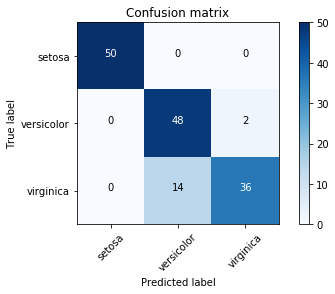

In [105]:
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

## Grafica de los clusters

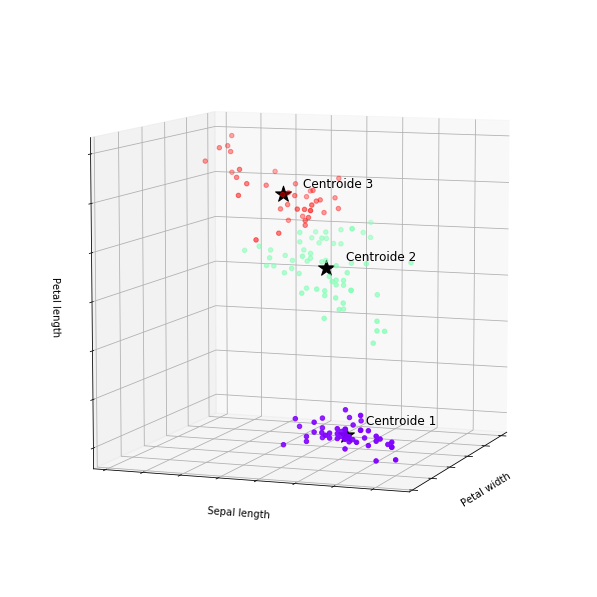

In [82]:
# plot the clusters in color
centroids = k_means.cluster_centers_
fig = plt.figure(1, figsize=(8, 8))
plt.clf()# borrar la figura actual
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()# borrar los ejes

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(np.float))
# graficar los centroides
for n in range(len(centroids)):
    ax.scatter(centroids[n,3],centroids[n,0],centroids[n,2],c = 'k',marker = '*',s=280)
    ax.text(centroids[n,3]+0.5,centroids[n,0],centroids[n,2],'Centroide {}'.format(n+1),fontsize =12)
        
plt.set_cmap('rainbow') # Color map para que se vea mas claro
#quitar los numeros de los ejes
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()